In [5]:
import cv2
import time
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

📸 Say cheese! Saving frame.
📸 Say cheese! Saving frame.


KeyboardInterrupt: 

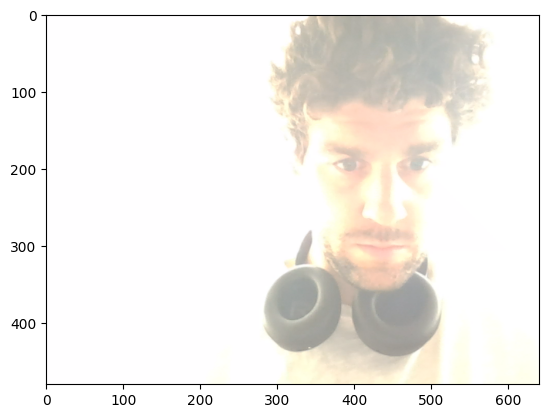

In [34]:
height = 128
width = 160
folder = "frames"
filename = "frame.jpg"



# Create the frames folder if it doesn't exist
frames_dir = os.path.join(os.getcwd(), folder)
os.makedirs(frames_dir, exist_ok=True)

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Wait for the camera to initialize and adjust light levels
time.sleep(2)

while True:
    ret, frame = cap.read()
    if ret:
        # Convert the frame to a PIL image
        resized_img = cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
        plt.imshow(img_rgb)


        # Save the frame as an image file
        print("📸 Say cheese! Saving frame.")
        path = os.path.join(frames_dir, filename)
        cv2.imwrite(path, resized_img)
    else:
        print("Failed to capture image")

    # Wait for 2 seconds
    time.sleep(2)

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()

In [41]:
from tensorflow.keras.preprocessing import image

img = image.load_img(path, target_size=(128, 160))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img = img/255.

In [42]:
img.shape

(1, 128, 160, 3)

In [43]:
from tensorflow.keras.models import load_model

model = load_model('model_epoch_01.h5')

import numpy as np

# Make predictions
predictions = model.predict(img)

print("Predictions:", predictions)

1/1 [==============================] - 2s 2s/step
Predictions: [[0.64359504 0.87895596 0.9208779  0.9529541  0.9964347  0.7880913
  0.7157961  0.897743   0.97498405 0.96696085 0.8763002  0.9913956
  0.9250494  0.96753174 0.8359089  0.7132416  0.90935135 0.9130518
  0.969025   0.97358954 0.993347   0.9756015  0.9402521  0.9872568
  0.875784   0.9997451  0.977027   0.8402029  0.5477354  0.8120202
  0.92155695 0.6208435  0.7716929  0.7033502  0.9153469  0.99837416
  0.9902248  0.9884561  0.9859282  0.9241606 ]]


In [45]:
column_names = ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']

In [54]:
predictions = np.where(predictions > 0.8,1,0)

In [56]:
import pandas as pd
connections = pd.DataFrame(predictions,columns=column_names[1:])

In [57]:
pd.set_option("display.max_columns",None)

In [58]:
connections

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1
